Yilei Dong | ID: 1466802171 | DSCI 352

### YouTube Spam Filtering
#### Building a simple spam filtering tool. Each data set has comment ID, author, date, and class (0 = ham, 1 = spam).


##### (a) Download the YouTube Spam Collection data set from: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection. We will mainly work with the Eminem file. Note that the chronological order of the comments were kept. 


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model 
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
import math

# Read in dataset 
df = pd.read_csv("Youtube04-Eminem.csv", engine='python')
df.shape

(448, 5)

In [2]:
# Display part of dataframe 
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxxï»¿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />ï»¿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Coolï»¿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastineï»¿,1


In [3]:
# Assign binary class labels 
print(df[df['CLASS'] == 0].shape)

(203, 5)


In [4]:
print(df[df['CLASS'] == 1].shape)

(245, 5)


In [5]:
hammy = 0.8 * 203
spammy = 0.8 * 245

##### (b) Select the first floor 0.8H of H hams and the first floor 0.8S of S spams as your training set and the rest as your test set. 

In [6]:
hamRows = math.floor(hammy)
spamRows = math.floor(spammy)

class0 = df.loc[df['CLASS']==0] 
class1 = df.loc[df['CLASS']==1] 

xHam = class0.drop('CLASS', axis=1)
yHam = class0['CLASS']
xSpam = class1.drop('CLASS', axis=1)
ySpam = class1['CLASS']

xHamTrain = xHam[:hamRows]
xSpamTrain = xSpam[:spamRows]
yHamTrain = yHam[:hamRows]
ySpamTrain = ySpam[:spamRows]

xHamTest = xHam[hamRows:]
xSpamTest = xSpam[spamRows:]
yHamTest = yHam[hamRows:]
ySpamTest = ySpam[spamRows:]

xTrains = [xHamTrain, xSpamTrain]
xTests = [xHamTest, xSpamTest]
xTrain = pd.concat(xTrains)
xTest = pd.concat(xTests)

yTrains = [yHamTrain, ySpamTrain]
yTests = [yHamTest, ySpamTest]
yTrain = pd.concat(yTrains)
yTest = pd.concat(yTests)

##### (c) Represent each comment using TF-IDF features. Consider each comment a document and the whole set of comments in the file (e.g. Eminem) as the corpus. Do NOT remove stop words.

In [7]:
# Format comments with TF-IDF features into x train 
contentCorpusTrain = xTrain['CONTENT']
vectorizer = TfidfVectorizer()
xTrainTFIDF = vectorizer.fit_transform(contentCorpusTrain)
print(vectorizer.get_feature_names())

['00', '000', '047000', '09', '10', '100', '100877300245414', '11', '12', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1b', '1billion', '1ï', '200', '2008', '200k', '2010', '2013', '2014', '2015', '2015ï', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2nd', '2zme8f', '30', '365', '36loseweight', '39', '3rd', '3â', '3ï', '4000', '41', '43', '447935454150', '45', '46', '476000', '490', '4eï', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '87', '90', 'abbas', 'ablaze', 'about', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'album', 'alcoholic

In [8]:
print(xTrainTFIDF.shape)

(358, 1476)


In [9]:
# Format comments with TF-IDF features into x test
contentCorpusTest = xTest['CONTENT']
xTestTFIDF = vectorizer.transform(contentCorpusTest)
print(vectorizer.get_feature_names())

['00', '000', '047000', '09', '10', '100', '100877300245414', '11', '12', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1b', '1billion', '1ï', '200', '2008', '200k', '2010', '2013', '2014', '2015', '2015ï', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2nd', '2zme8f', '30', '365', '36loseweight', '39', '3rd', '3â', '3ï', '4000', '41', '43', '447935454150', '45', '46', '476000', '490', '4eï', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '87', '90', 'abbas', 'ablaze', 'about', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'album', 'alcoholic

In [10]:
print(xTestTFIDF.shape)

(90, 1476)


##### (d) L2-penalized Logistic Regression

i. Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5, −4, . . . , 5}. 

In [11]:
import warnings 
warnings.filterwarnings('ignore')

In [12]:
logistic = linear_model.LogisticRegression()
penalty = ['l2']
c = [1/pow(10, i) for i in range(-5, 6)]

# Find best lambda
parameters = {"C": c, "penalty": penalty, "solver": ['liblinear']}
gridcv = GridSearchCV(logistic, parameters, cv=5, n_jobs=-1)
best_model = gridcv.fit(xTrainTFIDF, yTrain)
print('Best Lambda:- ', 1/best_model.best_estimator_.get_params()['C'])

Best Lambda:-  1.0


ii. Train L2-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set. 


In [13]:
# Predict for x & y train
y_trainPredictL2 = best_model.predict(xTrainTFIDF)

# Report metrics for training set 
print("Training Values for L2 Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_trainPredictL2))
print("ROC AUC:", metrics.roc_auc_score(yTrain, y_trainPredictL2))
print("Precision:", metrics.precision_score(yTrain, y_trainPredictL2))
print("Accuracy Score:", metrics.accuracy_score(yTrain, y_trainPredictL2))
print("Recall:", metrics.recall_score(yTrain, y_trainPredictL2))
print("F1 Score:", metrics.f1_score(yTrain, y_trainPredictL2))

Training Values for L2 Eminem:
Confusion Matrix:
[[162   0]
 [  5 191]]
ROC AUC: 0.9872448979591837
Precision: 1.0
Accuracy Score: 0.9860335195530726
Recall: 0.9744897959183674
F1 Score: 0.9870801033591732


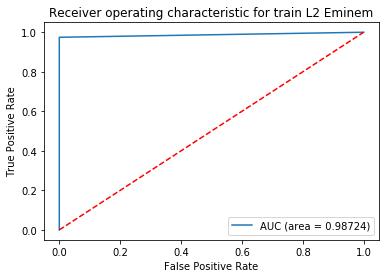

In [14]:
# Plot ROC of training set 
fpr, tpr, thresholds = roc_curve(yTrain, y_trainPredictL2, pos_label=1)
logit_roc_auc = roc_auc_score(yTrain, y_trainPredictL2)
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train L2 Eminem')
plt.legend(loc="lower right")
plt.show()

iii. Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set. Which one is more important in this application, precision or recall? Calculate Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}. 

In [15]:
# Predict for x & y test 
test_model = gridcv.fit(xTestTFIDF, yTest)
y_testPredictL2 = test_model.predict(xTestTFIDF)

# Report metrics for testing set
print("Test Values for L2 Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_testPredictL2))
print("ROC AUC:", metrics.roc_auc_score(yTest, y_testPredictL2))
print("Precision:", metrics.precision_score(yTest, y_testPredictL2))
print("Accuracy Score:", metrics.accuracy_score(yTest, y_testPredictL2))
print("Recall:", metrics.recall_score(yTest, y_testPredictL2))
print("F1 Score:", metrics.f1_score(yTest, y_testPredictL2))

Test Values for L2 Eminem:
Confusion Matrix:
[[41  0]
 [ 0 49]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


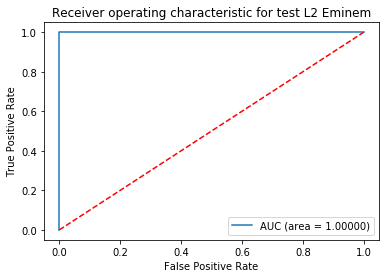

In [16]:
# Plotting ROC for testing set 
fpr1, tpr1, thresholds1 = roc_curve(yTest, y_testPredictL2, pos_label=1)
logit_roc_auc1 = roc_auc_score(yTest, y_testPredictL2)
plt.figure()
plt.plot(fpr1, tpr1, label='AUC (area = %0.5f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test L2 Eminem')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}
bs = [0.1, 0.5, 0.9, 1, 5, 10]
print("Fβ score for various β's")
for i in bs: 
    score = fbeta_score(yTest, y_testPredictL2, average='weighted', beta=i)
    print(str(i) + ": " + str(score))

Fβ score for various β's
0.1: 1.0
0.5: 1.0
0.9: 1.0
1: 1.0
5: 1.0
10: 1.0


##### (e) L1-penalized Logistic Regression

i. Determine λ using five fold cross-validation on your training set. Consider
log10 λ ∈ {−5, −4, . . . , 5}. 

In [18]:
logistique = linear_model.LogisticRegression()
penalty2 = ['l1']
c2 = [1/pow(10, i) for i in range(-5, 6)]

# Find best lambda
parameters2 = {"C": c2, "penalty": penalty2, "solver": ['liblinear']}
gridcv2 = GridSearchCV(logistique, parameters2, cv=5, n_jobs=-1)
best_modelL1 = gridcv2.fit(xTrainTFIDF, yTrain)
print('Best Lambda:- ', 1/best_modelL1.best_estimator_.get_params()['C'])

Best Lambda:-  0.001


ii. Train L1-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

In [19]:
# Predict for x & y train
y_trainPredictL1 = best_modelL1.predict(xTrainTFIDF)

# Report metrics for training set
print("Training Values for L1 Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_trainPredictL1))
print("ROC AUC:", metrics.roc_auc_score(yTrain, y_trainPredictL1))
print("Precision:", metrics.precision_score(yTrain, y_trainPredictL1))
print("Accuracy Score:", metrics.accuracy_score(yTrain, y_trainPredictL1))
print("Recall:", metrics.recall_score(yTrain, y_trainPredictL1))
print("F1 Score:", metrics.f1_score(yTrain, y_trainPredictL1))

Training Values for L1 Eminem:
Confusion Matrix:
[[162   0]
 [  0 196]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


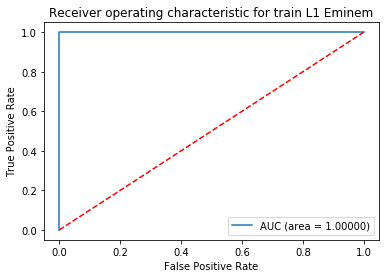

In [20]:
# Plotting ROC for training set 
fpr2, tpr2, thresholds2 = roc_curve(yTrain, y_trainPredictL1, pos_label=1)
logit_roc_auc2 = roc_auc_score(yTrain, y_trainPredictL1)
plt.figure()
plt.plot(fpr2, tpr2, label='AUC (area = %0.5f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train L1 Eminem')
plt.legend(loc="lower right")
plt.show()

iii. Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set. 


In [21]:
# Predict for x & y test 
test_modelL1 = gridcv2.fit(xTestTFIDF, yTest)
y_testPredictL1 = test_modelL1.predict(xTestTFIDF)

# Report metrics for testing set
print("Test Values for L1 Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_testPredictL1))
print("ROC AUC:", metrics.roc_auc_score(yTest, y_testPredictL1))
print("Precision:", metrics.precision_score(yTest, y_testPredictL1))
print("Accuracy Score:", metrics.accuracy_score(yTest, y_testPredictL1))
print("Recall:", metrics.recall_score(yTest, y_testPredictL1))
print("F1 Score:", metrics.f1_score(yTest, y_testPredictL1))

Test Values for L1 Eminem:
Confusion Matrix:
[[41  0]
 [ 0 49]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


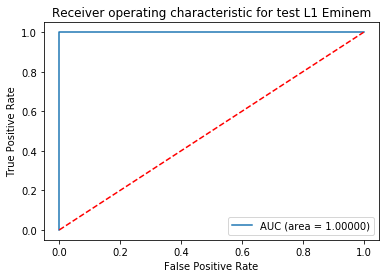

In [22]:
# Plotting ROC for testing set 
fpr3, tpr3, thresholds3 = roc_curve(yTest, y_testPredictL1, pos_label=1)
logit_roc_auc3 = roc_auc_score(yTest, y_testPredictL1)
plt.figure()
plt.plot(fpr3, tpr3, label='AUC (area = %0.5f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test L1 Eminem')
plt.legend(loc="lower right")
plt.show()

##### (f) Binary Classification Using Na¨ıve Bayes’ Classifiers

i. Solve the problem using a Na¨ıve Bayes’ classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. 

In [23]:
Gaussian = GaussianNB()
x_trainArray = xTrainTFIDF.toarray()

In [24]:
# Predict for x & y train
GaussianTrain = Gaussian.fit(x_trainArray, yTrain)
y_trainPreds = GaussianTrain.predict(x_trainArray)

# Report metrics for training set
print("Training Values for Gaussian NB Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_trainPreds))
print("ROC AUC:", metrics.roc_auc_score(yTrain, y_trainPreds))
print("Precision:", metrics.precision_score(yTrain, y_trainPreds))
print("Accuracy Score:", metrics.accuracy_score(yTrain, y_trainPreds))
print("Recall:", metrics.recall_score(yTrain, y_trainPreds))
print("F1 Score:", metrics.f1_score(yTrain, y_trainPreds))

Training Values for Gaussian NB Eminem:
Confusion Matrix:
[[162   0]
 [  0 196]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


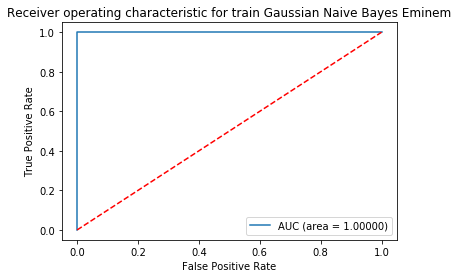

In [25]:
# Plotting ROC for training set 
fpr4, tpr4, thresholds4 = roc_curve(yTrain, y_trainPreds, pos_label=1)
logit_roc_auc4 = roc_auc_score(yTrain, y_trainPreds)
plt.figure()
plt.plot(fpr4, tpr4, label='AUC (area = %0.5f)' % logit_roc_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train Gaussian Naive Bayes Eminem')
plt.legend(loc="lower right")
plt.show()

In [26]:
x_testArray = xTestTFIDF.toarray()

# Predict for x & y test 
GaussianTest = Gaussian.fit(x_testArray, yTest)
y_testPreds = GaussianTest.predict(x_testArray)

# Report metrics for testing set
print("Testing Values for Gaussian NB Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_testPreds))
print("ROC AUC:", metrics.roc_auc_score(yTest, y_testPreds))
print("Precision:", metrics.precision_score(yTest, y_testPreds))
print("Accuracy Score:", metrics.accuracy_score(yTest, y_testPreds))
print("Recall:", metrics.recall_score(yTest, y_testPreds))
print("F1 Score:", metrics.f1_score(yTest, y_testPreds))

Testing Values for Gaussian NB Eminem:
Confusion Matrix:
[[41  0]
 [ 0 49]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


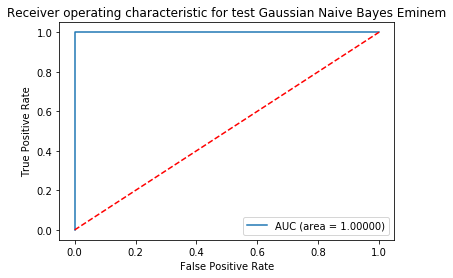

In [27]:
# Plotting ROC for testing set 
fpr5, tpr5, thresholds5 = roc_curve(yTest, y_testPreds, pos_label=1)
logit_roc_auc5 = roc_auc_score(yTest, y_testPreds)
plt.figure()
plt.plot(fpr5, tpr5, label='AUC (area = %0.5f)' % logit_roc_auc5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test Gaussian Naive Bayes Eminem')
plt.legend(loc="lower right")
plt.show()

##### (g) Repeat 1(f)i using multinomial priors.

In [28]:
multi = MultinomialNB()
multiTrain = multi.fit(x_trainArray, yTrain)
y_trainPredss = multiTrain.predict(x_trainArray)

print("Training Values for Multinomial NB Eminem:")
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_trainPredss))
print("ROC AUC:", metrics.roc_auc_score(yTrain, y_trainPredss))
print("Precision:", metrics.precision_score(yTrain, y_trainPredss))
print("Accuracy Score:", metrics.accuracy_score(yTrain, y_trainPredss))
print("Recall:", metrics.recall_score(yTrain, y_trainPredss))
print("F1 Score:", metrics.f1_score(yTrain, y_trainPredss))

Training Values for Multinomial NB Eminem:
Confusion Matrix:
[[155   7]
 [  0 196]]
ROC AUC: 0.9783950617283951
Precision: 0.9655172413793104
Accuracy Score: 0.9804469273743017
Recall: 1.0
F1 Score: 0.9824561403508771


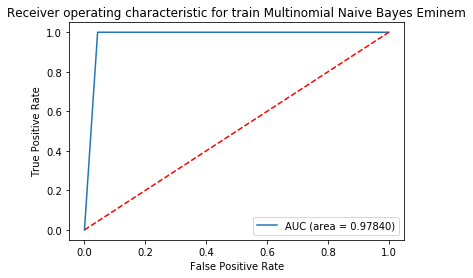

In [29]:
fpr6, tpr6, thresholds6 = roc_curve(yTrain, y_trainPredss, pos_label=1)
logit_roc_auc6 = roc_auc_score(yTrain, y_trainPredss)
plt.figure()
plt.plot(fpr6, tpr6, label='AUC (area = %0.5f)' % logit_roc_auc6)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train Multinomial Naive Bayes Eminem')
plt.legend(loc="lower right")
plt.show()

In [30]:
multiTest = multi.fit(x_testArray, yTest)
y_testPredss = multiTrain.predict(x_testArray)

print("Testing Values:")
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_testPredss))
print("ROC AUC:", metrics.roc_auc_score(yTest, y_testPredss))
print("Precision:", metrics.precision_score(yTest, y_testPredss))
print("Accuracy Score:", metrics.accuracy_score(yTest, y_testPredss))
print("Recall:", metrics.recall_score(yTest, y_testPredss))
print("F1 Score:", metrics.f1_score(yTest, y_testPredss))

Testing Values:
Confusion Matrix:
[[34  7]
 [ 0 49]]
ROC AUC: 0.9146341463414633
Precision: 0.875
Accuracy Score: 0.9222222222222223
Recall: 1.0
F1 Score: 0.9333333333333333


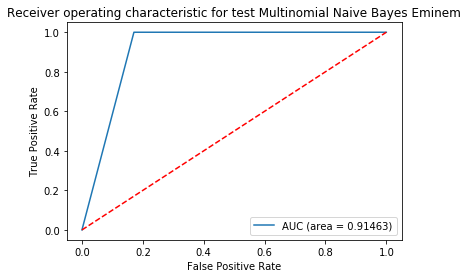

In [31]:
fpr7, tpr7, thresholds7 = roc_curve(yTest, y_testPredss, pos_label=1)
logit_roc_auc7 = roc_auc_score(yTest, y_testPredss)
plt.figure()
plt.plot(fpr7, tpr7, label='AUC (area = %0.5f)' % logit_roc_auc7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test Multinomial Naive Bayes Eminem')
plt.legend(loc="lower right")
plt.show()

##### (h) Create one table for each of the five data sets: Shakira, Eminem, LMFAO, KatyPerry, and Psy to compare accuracy, precision, recall, F1 score and AUC of L1-penalized and L2-penalized logistic regression, Na¨ıve Bayes’ with Gaussian and multinomial priors for the test sets. Use the first b0.8Hc of H hams and the first b0.8Sc of S spams as your training set and the rest as your test set. Show the best score in each column using boldface. A hypothetical table is shown below:

In [32]:
# Read in other 4 data sets: 
df2 = pd.read_csv("Youtube01-Psy.csv", engine='python')
df3 = pd.read_csv("Youtube02-KatyPerry.csv", engine='python')
df4 = pd.read_csv("Youtube03-LMFAO.csv", engine='python')
df5 = pd.read_csv("Youtube05-Shakira.csv", engine='python')

Creation of Table for Psy 

In [33]:
df2.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


In [34]:
print(df2[df2['CLASS'] == 0].shape)

(175, 5)


In [35]:
print(df2[df2['CLASS'] == 1].shape)

(175, 5)


In [36]:
hammyPsy = 0.8 * 175
spammyPsy = 0.8 * 175

In [37]:
# Split into train & test set for Psy 

hamRowsPsy = math.floor(hammyPsy)
spamRowsPsy = math.floor(spammyPsy)

class0_psy = df2.loc[df2['CLASS']==0] 
class1_psy = df2.loc[df2['CLASS']==1] 

xHamPsy = class0_psy.drop('CLASS', axis=1)
yHamPsy = class0_psy['CLASS']
xSpamPsy = class1_psy.drop('CLASS', axis=1)
ySpamPsy = class1_psy['CLASS']

xHamTrainPsy = xHamPsy[:hamRowsPsy]
xSpamTrainPsy = xSpamPsy[:spamRowsPsy]
yHamTrainPsy = yHamPsy[:hamRowsPsy]
ySpamTrainPsy = ySpamPsy[:spamRowsPsy]

xHamTestPsy = xHamPsy[hamRowsPsy:]
xSpamTestPsy = xSpamPsy[spamRowsPsy:]
yHamTestPsy = yHamPsy[hamRowsPsy:]
ySpamTestPsy = ySpamPsy[spamRowsPsy:]

xTrainsPsy = [xHamTrainPsy, xSpamTrainPsy]
xTestsPsy = [xHamTestPsy, xSpamTestPsy]
xTrainPsy = pd.concat(xTrainsPsy)
xTestPsy = pd.concat(xTestsPsy)

yTrainsPsy = [yHamTrainPsy, ySpamTrainPsy]
yTestsPsy = [yHamTestPsy, ySpamTestPsy]
yTrainPsy = pd.concat(yTrainsPsy)
yTestPsy = pd.concat(yTestsPsy)

In [38]:
# TFIDF for Psy train & test 
contentCorpusTrainPsy = xTrainPsy['CONTENT']
vectorizerPsy = TfidfVectorizer()
xTrainPsyTFIDF = vectorizerPsy.fit_transform(contentCorpusTrainPsy)
print(vectorizerPsy.get_feature_names())

['000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '11', '1111ï', '112720997191206369631', '12', '123ï', '124', '124923004', '126', '127', '13017194ï', '131338190916', '134470083389909', '1415297812', '1495323920744243', '171183229277', '19924', '1firo', '2009', '2012', '2012bitchesï', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398ï', '279', '29', '2b', '2billion', '2x10', '3000', '313327', '315', '33gxrf', '33ï', '39', '3ï', '40beuutvu2zkxk4utgpz8kï', '4604617ï', '492', '4shared', '50', '521', '5277478', '5287', '5800', '5million', '5s', '616375350ï', '636', '6381501', '694', '700', '750', '783', '79', '821', '884', '898', '8bit', '9107ï', '9277547', '950', '969', '9bzkp7q19f0ï', '__killuminati94ï', '_chris_cz', '_trksid', 'aaaaaaa', 'able', 'about', 'above', 'absolutely', 'access', 'accessories', 'account', 'accounts', 'acn2gï', 'active', 'actor', 'actually', 'add', 'adding', 'admit', 'advice', 'affiliateid', 'after', '

In [39]:
contentCorpusTestPsy = xTestPsy['CONTENT']
xTestPsyTFIDF = vectorizerPsy.transform(contentCorpusTestPsy)
print(vectorizerPsy.get_feature_names())

['000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '11', '1111ï', '112720997191206369631', '12', '123ï', '124', '124923004', '126', '127', '13017194ï', '131338190916', '134470083389909', '1415297812', '1495323920744243', '171183229277', '19924', '1firo', '2009', '2012', '2012bitchesï', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398ï', '279', '29', '2b', '2billion', '2x10', '3000', '313327', '315', '33gxrf', '33ï', '39', '3ï', '40beuutvu2zkxk4utgpz8kï', '4604617ï', '492', '4shared', '50', '521', '5277478', '5287', '5800', '5million', '5s', '616375350ï', '636', '6381501', '694', '700', '750', '783', '79', '821', '884', '898', '8bit', '9107ï', '9277547', '950', '969', '9bzkp7q19f0ï', '__killuminati94ï', '_chris_cz', '_trksid', 'aaaaaaa', 'able', 'about', 'above', 'absolutely', 'access', 'accessories', 'account', 'accounts', 'acn2gï', 'active', 'actor', 'actually', 'add', 'adding', 'admit', 'advice', 'affiliateid', 'after', '

In [40]:
# Best Lambda for L2-penalized logistic regression of Psy
logisticPsy = linear_model.LogisticRegression()
penaltyPsy1 = ['l2']
cPsy1 = [1/pow(10, i) for i in range(-5, 6)]

parametersPsy1 = {"C": cPsy1, "penalty": penaltyPsy1, "solver": ['liblinear']}
gridcvPsy = GridSearchCV(logisticPsy, parametersPsy1, cv=5, n_jobs=-1)
best_modelPsyL2 = gridcvPsy.fit(xTrainPsyTFIDF, yTrainPsy)
print('Best Lambda:- ', 1/best_modelPsyL2.best_estimator_.get_params()['C'])

Best Lambda:-  0.1


In [41]:
# L2-penalized logistic regression for Psy train
y_trainPsyL2 = best_modelPsyL2.predict(xTrainPsyTFIDF)

print("Training Values for L2 Psy:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainPsy, y_trainPsyL2))
print("ROC AUC:", metrics.roc_auc_score(yTrainPsy, y_trainPsyL2))
print("Precision:", metrics.precision_score(yTrainPsy, y_trainPsyL2))
print("Accuracy Score:", metrics.accuracy_score(yTrainPsy, y_trainPsyL2))
print("Recall:", metrics.recall_score(yTrainPsy, y_trainPsyL2))
print("F1 Score:", metrics.f1_score(yTrainPsy, y_trainPsyL2))

Training Values for L2 Psy:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [42]:
# L2-penalized logistic regression for Psy test
test_modelPsy = gridcvPsy.fit(xTestPsyTFIDF, yTestPsy)
y_testPsyL2 = test_modelPsy.predict(xTestPsyTFIDF)

PSYL2rocauc = metrics.roc_auc_score(yTestPsy, y_testPsyL2)*100
PSYL2precision = metrics.precision_score(yTestPsy, y_testPsyL2)*100
PSYL2accuracy = metrics.accuracy_score(yTestPsy, y_testPsyL2)*100
PSYL2recall = metrics.recall_score(yTestPsy, y_testPsyL2)*100
PSYL2F1 = metrics.f1_score(yTestPsy, y_testPsyL2)*100

In [43]:
# L1-penalized logistic regression for Psy
logistiquePsy = linear_model.LogisticRegression()
penaltyPsy2 = ['l1']
cPsy2 = [1/pow(10, i) for i in range(-5, 6)]

parametersPsy2 = {"C": cPsy2, "penalty": penaltyPsy2, "solver": ['liblinear']}
gridcv2Psy = GridSearchCV(logistiquePsy, parametersPsy2, cv=5, n_jobs=-1)
best_modelPsyL1 = gridcv2Psy.fit(xTrainPsyTFIDF, yTrainPsy)
print('Best Lambda:- ', 1/best_modelPsyL1.best_estimator_.get_params()['C'])

Best Lambda:-  0.0001


In [44]:
# L1-penalized logistic regression for Psy train
y_trainPsyL1 = best_modelPsyL1.predict(xTrainPsyTFIDF)

print("Training Values for L1 Psy:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainPsy, y_trainPsyL1))
print("ROC AUC:", metrics.roc_auc_score(yTrainPsy, y_trainPsyL1))
print("Precision:", metrics.precision_score(yTrainPsy, y_trainPsyL1))
print("Accuracy Score:", metrics.accuracy_score(yTrainPsy, y_trainPsyL1))
print("Recall:", metrics.recall_score(yTrainPsy, y_trainPsyL1))
print("F1 Score:", metrics.f1_score(yTrainPsy, y_trainPsyL1))

Training Values for L1 Psy:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [45]:
# L1-penalized logistic regression for Psy test
test_modelPsy = gridcv2Psy.fit(xTestPsyTFIDF, yTestPsy)
y_testPsyL1 = test_modelPsy.predict(xTestPsyTFIDF)

PSYL1rocauc = metrics.roc_auc_score(yTestPsy, y_testPsyL1)*100
PSYL1precision = metrics.precision_score(yTestPsy, y_testPsyL1)*100
PSYL1accuracy = metrics.accuracy_score(yTestPsy, y_testPsyL1)*100
PSYL1recall = metrics.recall_score(yTestPsy, y_testPsyL1)*100
PSYL1F1 = metrics.f1_score(yTestPsy, y_testPsyL1)*100

In [46]:
# Gaussian NB for Psy train
Gaussian = GaussianNB()
x_trainArrayPsy = xTrainPsyTFIDF.toarray()
GaussianTrainPsy = Gaussian.fit(x_trainArrayPsy, yTrainPsy)
y_trainPredsPsy = GaussianTrainPsy.predict(x_trainArrayPsy)

print("Training Values for Gaussian NB Psy:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainPsy, y_trainPredsPsy))
print("ROC AUC:", metrics.roc_auc_score(yTrainPsy, y_trainPredsPsy))
print("Precision:", metrics.precision_score(yTrainPsy, y_trainPredsPsy))
print("Accuracy Score:", metrics.accuracy_score(yTrainPsy, y_trainPredsPsy))
print("Recall:", metrics.recall_score(yTrainPsy, y_trainPredsPsy))
print("F1 Score:", metrics.f1_score(yTrainPsy, y_trainPredsPsy))

Training Values for Gaussian NB Psy:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [47]:
# Gaussian NB for Psy test
x_testArrayPsy = xTestPsyTFIDF.toarray()
GaussianTestPsy = Gaussian.fit(x_testArrayPsy, yTestPsy)
y_testPredsPsy = GaussianTestPsy.predict(x_testArrayPsy)

PSYGaussianrocauc = metrics.roc_auc_score(yTestPsy, y_testPredsPsy)*100
PSYGaussianprecision = metrics.precision_score(yTestPsy, y_testPredsPsy)*100
PSYGaussianaccuracy = metrics.accuracy_score(yTestPsy, y_testPredsPsy)*100
PSYGaussianrecall = metrics.recall_score(yTestPsy, y_testPredsPsy)*100
PSYGaussianF1 = metrics.f1_score(yTestPsy, y_testPredsPsy)*100

In [48]:
# Multinomial NB for Psy train
multi = MultinomialNB()
multiTrainPsy = multi.fit(x_trainArrayPsy, yTrainPsy)
y_trainPredssPsy = multiTrainPsy.predict(x_trainArrayPsy)

print("Training Values for Multinomial NB Psy:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainPsy, y_trainPredssPsy))
print("ROC AUC:", metrics.roc_auc_score(yTrainPsy, y_trainPredssPsy))
print("Precision:", metrics.precision_score(yTrainPsy, y_trainPredssPsy))
print("Accuracy Score:", metrics.accuracy_score(yTrainPsy, y_trainPredssPsy))
print("Recall:", metrics.recall_score(yTrainPsy, y_trainPredssPsy))
print("F1 Score:", metrics.f1_score(yTrainPsy, y_trainPredssPsy))

Training Values for Multinomial NB Psy:
Confusion Matrix:
[[139   1]
 [  0 140]]
ROC AUC: 0.9964285714285714
Precision: 0.9929078014184397
Accuracy Score: 0.9964285714285714
Recall: 1.0
F1 Score: 0.9964412811387899


In [49]:
# Multinomial NB for Psy test
multiTestPsy = multi.fit(x_testArrayPsy, yTestPsy)
y_testPredssPsy = multiTestPsy.predict(x_testArrayPsy)

PSYMultirocauc = metrics.roc_auc_score(yTestPsy, y_testPredssPsy)*100
PSYMultiprecision = metrics.precision_score(yTestPsy, y_testPredssPsy)*100
PSYMultiaccuracy = metrics.accuracy_score(yTestPsy, y_testPredssPsy)*100
PSYMultirecall = metrics.recall_score(yTestPsy, y_testPredssPsy)*100
PSYMultiF1 = metrics.f1_score(yTestPsy, y_testPredssPsy)*100

In [50]:
dataPsy = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'],
        'Accuracy (%)':[PSYGaussianaccuracy, PSYMultiaccuracy, PSYL2accuracy, PSYL1accuracy], 
        'Precision (%)':[PSYGaussianprecision, PSYMultiprecision, PSYL2precision, PSYL1precision], 
           'Recall (%)':[PSYGaussianrecall, PSYMultirecall, PSYL2recall, PSYL1recall],
           'F1 (%)':[PSYGaussianF1, PSYMultiF1, PSYL2F1, PSYL1F1], 
           'AUC (%)': [PSYGaussianrocauc, PSYMultirocauc, PSYL2rocauc, PSYL1rocauc]}
  
dfPsy = pd.DataFrame(dataPsy)
print('Psy:')
dfPsy

Psy:


,Instance,Accuracy (%),Precision (%),Recall (%),F1 (%),AUC (%)
0,NB-Gaussian,100.0,100.0,100.0,100.0,100.0
1,NB-Multinomial,100.0,100.0,100.0,100.0,100.0
2,L2,100.0,100.0,100.0,100.0,100.0
3,L1,100.0,100.0,100.0,100.0,100.0


Creation of Table for Katy Perry 

In [51]:
df3.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [52]:
print(df3[df3['CLASS'] == 0].shape)

(175, 5)


In [53]:
print(df3[df3['CLASS'] == 1].shape)

(175, 5)


In [54]:
hammyKP = 0.8 * 175
spammyKP = 0.8 * 175

In [55]:
# Split into train & test set for Katy Perry

hamRowsKP = math.floor(hammyKP)
spamRowsKP = math.floor(spammyKP)

class0_KP = df3.loc[df3['CLASS']==0] 
class1_KP = df3.loc[df3['CLASS']==1] 

xHamKP = class0_KP.drop('CLASS', axis=1)
yHamKP = class0_KP['CLASS']
xSpamKP = class1_KP.drop('CLASS', axis=1)
ySpamKP = class1_KP['CLASS']

xHamTrainKP = xHamKP[:hamRowsKP]
xSpamTrainKP = xSpamKP[:spamRowsKP]
yHamTrainKP = yHamKP[:hamRowsKP]
ySpamTrainKP = ySpamKP[:spamRowsKP]

xHamTestKP = xHamKP[hamRowsKP:]
xSpamTestKP = xSpamKP[spamRowsKP:]
yHamTestKP = yHamKP[hamRowsKP:]
ySpamTestKP = ySpamKP[spamRowsKP:]

xTrainsKP = [xHamTrainKP, xSpamTrainKP]
xTestsKP = [xHamTestKP, xSpamTestKP]
xTrainKP = pd.concat(xTrainsKP)
xTestKP = pd.concat(xTestsKP)

yTrainsKP = [yHamTrainKP, ySpamTrainKP]
yTestsKP = [yHamTestKP, ySpamTestKP]
yTrainKP = pd.concat(yTrainsKP)
yTestKP = pd.concat(yTestsKP)

In [56]:
# TFIDF for Katy Perry train & test 
contentCorpusTrainKP = xTrainKP['CONTENT']
vectorizerKP = TfidfVectorizer()
xTrainKPTFIDF = vectorizerKP.fit_transform(contentCorpusTrainKP)
print(vectorizerKP.get_feature_names())

['00', '000', '002', '018', '053012', '0cb8qfjaa', '0d878a889cï', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2bï', '10', '100', '1000', '100007085325116ï', '10001', '10626048', '10626835', '106865403ï', '107297364ï', '1073741830', '1073741943', '111719098841907', '111982027348137311818', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905ï', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvemï', '1min', '20', '2012430', '2014', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '2ï', '30', '302703146601369', '30th', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '3ï', '4483179854075', '46', '4s', '500m', '5094', '53331', '5337555197', '53481', '543627485763966', '5575096797', '5bgkg2iwphzohwaeuesrwnegqg_lab

In [57]:
contentCorpusTestKP = xTestKP['CONTENT']
xTestKPTFIDF = vectorizerKP.transform(contentCorpusTestKP)
print(vectorizerKP.get_feature_names())

['00', '000', '002', '018', '053012', '0cb8qfjaa', '0d878a889cï', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2bï', '10', '100', '1000', '100007085325116ï', '10001', '10626048', '10626835', '106865403ï', '107297364ï', '1073741830', '1073741943', '111719098841907', '111982027348137311818', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905ï', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvemï', '1min', '20', '2012430', '2014', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '2ï', '30', '302703146601369', '30th', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '3ï', '4483179854075', '46', '4s', '500m', '5094', '53331', '5337555197', '53481', '543627485763966', '5575096797', '5bgkg2iwphzohwaeuesrwnegqg_lab

In [58]:
# Best Lambda for L2-penalized logistic regression of Katy Perry
logisticKP = linear_model.LogisticRegression()
penaltyKP1 = ['l2']
cKP1 = [1/pow(10, i) for i in range(-5, 6)]

parametersKP1 = {"C": cKP1, "penalty": penaltyKP1, "solver": ['liblinear']}
gridcvKP = GridSearchCV(logisticKP, parametersKP1, cv=5, n_jobs=-1)
best_modelKPL2 = gridcvKP.fit(xTrainKPTFIDF, yTrainKP)
print('Best Lambda:- ', 1/best_modelKPL2.best_estimator_.get_params()['C'])

Best Lambda:-  1e-05


In [59]:
# L2-penalized logistic regression for Katy Perry train
y_trainKPL2 = best_modelKPL2.predict(xTrainKPTFIDF)

print("Training Values for L2 Katy Perry:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainKP, y_trainKPL2))
print("ROC AUC:", metrics.roc_auc_score(yTrainKP, y_trainKPL2))
print("Precision:", metrics.precision_score(yTrainKP, y_trainKPL2))
print("Accuracy Score:", metrics.accuracy_score(yTrainKP, y_trainKPL2))
print("Recall:", metrics.recall_score(yTrainKP, y_trainKPL2))
print("F1 Score:", metrics.f1_score(yTrainKP, y_trainKPL2))

Training Values for L2 Katy Perry:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [60]:
# L2-penalized logistic regression for Katy Perry test
test_modelKP = gridcvKP.fit(xTestKPTFIDF, yTestKP)
y_testKPL2 = test_modelKP.predict(xTestKPTFIDF)

KPL2rocauc = metrics.roc_auc_score(yTestKP, y_testKPL2)*100
KPL2precision = metrics.precision_score(yTestKP, y_testKPL2)*100
KPL2accuracy = metrics.accuracy_score(yTestKP, y_testKPL2)*100
KPL2recall = metrics.recall_score(yTestKP, y_testKPL2)*100
KPL2F1 = metrics.f1_score(yTestKP, y_testKPL2)*100

In [61]:
# Best Lambda for L1-penalized logistic regression of Katy Perry
logistiqueKP = linear_model.LogisticRegression()
penaltyKP2 = ['l1']
cKP2 = [1/pow(10, i) for i in range(-5, 6)]

parametersKP2 = {"C": cKP2, "penalty": penaltyKP2, "solver": ['liblinear']}
gridcv2KP = GridSearchCV(logistiqueKP, parametersKP2, cv=5, n_jobs=-1)
best_modelKPL1 = gridcv2KP.fit(xTrainKPTFIDF, yTrainKP)
print('Best Lambda:- ', 1/best_modelKPL1.best_estimator_.get_params()['C'])

Best Lambda:-  0.0001


In [62]:
# L1-penalized logistic regression for Katy Perry train
y_trainKPL1 = best_modelKPL1.predict(xTrainKPTFIDF)

print("Training Values for L1 Katy Perry:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainKP, y_trainKPL1))
print("ROC AUC:", metrics.roc_auc_score(yTrainKP, y_trainKPL1))
print("Precision:", metrics.precision_score(yTrainKP, y_trainKPL1))
print("Accuracy Score:", metrics.accuracy_score(yTrainKP, y_trainKPL1))
print("Recall:", metrics.recall_score(yTrainKP, y_trainKPL1))
print("F1 Score:", metrics.f1_score(yTrainKP, y_trainKPL1))

Training Values for L1 Katy Perry:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [63]:
# L1-penalized logistic regression for Katy Perry test
test_modelKP = gridcv2KP.fit(xTestKPTFIDF, yTestKP)
y_testKPL1 = test_modelKP.predict(xTestKPTFIDF)

KPL1rocauc = metrics.roc_auc_score(yTestKP, y_testKPL1)*100
KPL1precision = metrics.precision_score(yTestKP, y_testKPL1)*100
KPL1accuracy = metrics.accuracy_score(yTestKP, y_testKPL1)*100
KPL1recall = metrics.recall_score(yTestKP, y_testKPL1)*100
KPL1F1 = metrics.f1_score(yTestKP, y_testKPL1)*100

In [64]:
# Gaussian NB for Katy Perry train
Gaussian = GaussianNB()
x_trainArrayKP = xTrainKPTFIDF.toarray()
GaussianTrainKP = Gaussian.fit(x_trainArrayKP, yTrainKP)
y_trainPredsKP = GaussianTrainKP.predict(x_trainArrayKP)

print("Training Values for Gaussian NB Katy Perry:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainKP, y_trainPredsKP))
print("ROC AUC:", metrics.roc_auc_score(yTrainKP, y_trainPredsKP))
print("Precision:", metrics.precision_score(yTrainKP, y_trainPredsKP))
print("Accuracy Score:", metrics.accuracy_score(yTrainKP, y_trainPredsKP))
print("Recall:", metrics.recall_score(yTrainKP, y_trainPredsKP))
print("F1 Score:", metrics.f1_score(yTrainKP, y_trainPredsKP))

Training Values for Gaussian NB Katy Perry:
Confusion Matrix:
[[140   0]
 [  0 140]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [65]:
# Gaussian NB for Katy Perry test
x_testArrayKP = xTestKPTFIDF.toarray()
GaussianTestKP = Gaussian.fit(x_testArrayKP, yTestKP)
y_testPredsKP = GaussianTestKP.predict(x_testArrayKP)

KPGaussianrocauc = metrics.roc_auc_score(yTestKP, y_testPredsKP)*100
KPGaussianprecision = metrics.precision_score(yTestKP, y_testPredsKP)*100
KPGaussianaccuracy = metrics.accuracy_score(yTestKP, y_testPredsKP)*100
KPGaussianrecall = metrics.recall_score(yTestKP, y_testPredsKP)*100
KPGaussianF1 = metrics.f1_score(yTestKP, y_testPredsKP)*100

In [66]:
# Multinomial NB for Katy Perry train
multi = MultinomialNB()
multiTrainKP = multi.fit(x_trainArrayKP, yTrainKP)
y_trainPredssKP = multiTrainKP.predict(x_trainArrayKP)

print("Training Values for Multinomial NB Katy Perry:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainKP, y_trainPredssKP))
print("ROC AUC:", metrics.roc_auc_score(yTrainKP, y_trainPredssKP))
print("Precision:", metrics.precision_score(yTrainKP, y_trainPredssKP))
print("Accuracy Score:", metrics.accuracy_score(yTrainKP, y_trainPredssKP))
print("Recall:", metrics.recall_score(yTrainKP, y_trainPredssKP))
print("F1 Score:", metrics.f1_score(yTrainKP, y_trainPredssKP))

Training Values for Multinomial NB Katy Perry:
Confusion Matrix:
[[140   0]
 [  2 138]]
ROC AUC: 0.9928571428571429
Precision: 1.0
Accuracy Score: 0.9928571428571429
Recall: 0.9857142857142858
F1 Score: 0.9928057553956835


In [67]:
# Multinomial NB for Katy Perry test 
multiTestKP = multi.fit(x_testArrayKP, yTestKP)
y_testPredssKP = multiTestKP.predict(x_testArrayKP)

KPMultirocauc = metrics.roc_auc_score(yTestKP, y_testPredssKP)*100
KPMultiprecision = metrics.precision_score(yTestKP, y_testPredssKP)*100
KPMultiaccuracy = metrics.accuracy_score(yTestKP, y_testPredssKP)*100
KPMultirecall = metrics.recall_score(yTestKP, y_testPredssKP)*100
KPMultiF1 = metrics.f1_score(yTestKP, y_testPredssKP)*100

In [68]:
# Creation of data frame with results for Katy Perry 
dataKP = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'],
        'Accuracy (%)':[KPGaussianaccuracy, KPMultiaccuracy, KPL2accuracy, KPL1accuracy], 
        'Precision (%)':[KPGaussianprecision, KPMultiprecision, KPL2precision, KPL1precision], 
           'Recall (%)':[KPGaussianrecall, KPMultirecall, KPL2recall, KPL1recall],
           'F1 (%)':[KPGaussianF1, KPMultiF1, KPL2F1, KPL1F1], 
           'AUC (%)': [KPGaussianrocauc, KPMultirocauc, KPL2rocauc, KPL1rocauc]}
  
dfKP = pd.DataFrame(dataKP)
print('Katy Perry:')
dfKP

Katy Perry:


,Instance,Accuracy (%),Precision (%),Recall (%),F1 (%),AUC (%)
0,NB-Gaussian,98.571429,100.0,97.142857,98.550725,98.571429
1,NB-Multinomial,98.571429,100.0,97.142857,98.550725,98.571429
2,L2,100.000000,100.0,100.000000,100.000000,100.000000
3,L1,100.000000,100.0,100.000000,100.000000,100.000000


Creation of Table for LMFAO

In [69]:
df4.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funnyï»¿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!ï»¿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rockï»¿,0


In [70]:
print(df4[df4['CLASS'] == 0].shape)
print(df4[df4['CLASS'] == 1].shape)

(202, 5)
(236, 5)


In [71]:
hammyLMFAO = 0.8 * 202
spammyLMFAO = 0.8 * 236

In [72]:
# Split into train & test set for LMFAO

hamRowsLMFAO = math.floor(hammyLMFAO)
spamRowsLMFAO = math.floor(spammyLMFAO)

class0_LMFAO = df4.loc[df4['CLASS']==0] 
class1_LMFAO = df4.loc[df4['CLASS']==1] 

xHamLMFAO = class0_LMFAO.drop('CLASS', axis=1)
yHamLMFAO = class0_LMFAO['CLASS']
xSpamLMFAO = class1_LMFAO.drop('CLASS', axis=1)
ySpamLMFAO = class1_LMFAO['CLASS']

xHamTrainLMFAO = xHamLMFAO[:hamRowsLMFAO]
xSpamTrainLMFAO = xSpamLMFAO[:spamRowsLMFAO]
yHamTrainLMFAO = yHamLMFAO[:hamRowsLMFAO]
ySpamTrainLMFAO = ySpamLMFAO[:spamRowsLMFAO]

xHamTestLMFAO = xHamLMFAO[hamRowsLMFAO:]
xSpamTestLMFAO = xSpamLMFAO[spamRowsLMFAO:]
yHamTestLMFAO = yHamLMFAO[hamRowsLMFAO:]
ySpamTestLMFAO = ySpamLMFAO[spamRowsLMFAO:]

xTrainsLMFAO = [xHamTrainLMFAO, xSpamTrainLMFAO]
xTestsLMFAO = [xHamTestLMFAO, xSpamTestLMFAO]
xTrainLMFAO = pd.concat(xTrainsLMFAO)
xTestLMFAO = pd.concat(xTestsLMFAO)

yTrainsLMFAO = [yHamTrainLMFAO, ySpamTrainLMFAO]
yTestsLMFAO = [yHamTestLMFAO, ySpamTestLMFAO]
yTrainLMFAO = pd.concat(yTrainsLMFAO)
yTestLMFAO = pd.concat(yTestsLMFAO)

In [73]:
# TFIDF for LMFAO train & test 
contentCorpusTrainLMFAO = xTrainLMFAO['CONTENT']
vectorizerLMFAO = TfidfVectorizer()
xTrainLMFAOTFIDF = vectorizerLMFAO.fit_transform(contentCorpusTrainLMFAO)
print(vectorizerLMFAO.get_feature_names())

['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '15', '17', '19', '1bi', '1m00s', '1ï', '20', '2004ï', '2011', '2011ï', '2015', '2015â', '2015ï', '2016ï', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '3ï', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '57', '5th', '666', '800', '851', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000â', '920', '__', '______________________', '______________________________', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'after', 'agree', 'ah', 'ahhh', 'airli

In [74]:
contentCorpusTestLMFAO = xTestLMFAO['CONTENT']
xTestLMFAOTFIDF = vectorizerLMFAO.transform(contentCorpusTestLMFAO)
print(vectorizerLMFAO.get_feature_names())

['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '15', '17', '19', '1bi', '1m00s', '1ï', '20', '2004ï', '2011', '2011ï', '2015', '2015â', '2015ï', '2016ï', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '3ï', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '57', '5th', '666', '800', '851', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000â', '920', '__', '______________________', '______________________________', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'after', 'agree', 'ah', 'ahhh', 'airli

In [75]:
# Best lambda for L2-penalized logistic regression for LMFAO 
logisticLMFAO = linear_model.LogisticRegression()
penaltyLMFAO1 = ['l2']
cLMFAO1 = [1/pow(10, i) for i in range(-5, 6)]

parametersLMFAO1 = {"C": cLMFAO1, "penalty": penaltyLMFAO1, "solver": ['liblinear']}
gridcvLMFAO = GridSearchCV(logisticLMFAO, parametersLMFAO1, cv=5, n_jobs=-1)
best_modelLMFAOL2 = gridcvLMFAO.fit(xTrainLMFAOTFIDF, yTrainLMFAO)
print('Best Lambda:- ', 1/best_modelLMFAOL2.best_estimator_.get_params()['C'])

Best Lambda:-  0.01


In [76]:
# L2-penalized logistic regression for LMFAO train
y_trainLMFAOL2 = best_modelLMFAOL2.predict(xTrainLMFAOTFIDF)

print("Training Values for L2 LMFAO:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainLMFAO, y_trainLMFAOL2))
print("ROC AUC:", metrics.roc_auc_score(yTrainLMFAO, y_trainLMFAOL2))
print("Precision:", metrics.precision_score(yTrainLMFAO, y_trainLMFAOL2))
print("Accuracy Score:", metrics.accuracy_score(yTrainLMFAO, y_trainLMFAOL2))
print("Recall:", metrics.recall_score(yTrainLMFAO, y_trainLMFAOL2))
print("F1 Score:", metrics.f1_score(yTrainLMFAO, y_trainLMFAOL2))

Training Values for L2 LMFAO:
Confusion Matrix:
[[161   0]
 [  0 188]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [77]:
# L2-penalized logistic regression for LMFAO test
test_modelLMFAO = gridcvLMFAO.fit(xTestLMFAOTFIDF, yTestLMFAO)
y_testLMFAOL2 = test_modelLMFAO.predict(xTestLMFAOTFIDF)

LMFAOL2rocauc = metrics.roc_auc_score(yTestLMFAO, y_testLMFAOL2)*100
LMFAOL2precision = metrics.precision_score(yTestLMFAO, y_testLMFAOL2)*100
LMFAOL2accuracy = metrics.accuracy_score(yTestLMFAO, y_testLMFAOL2)*100
LMFAOL2recall = metrics.recall_score(yTestLMFAO, y_testLMFAOL2)*100
LMFAOL2F1 = metrics.f1_score(yTestLMFAO, y_testLMFAOL2)*100

In [78]:
# Best lamda for L1-penalized logistic regression for LMFAO 
logistiqueLMFAO = linear_model.LogisticRegression()
penaltyLMFAO2 = ['l1']
cLMFAO2 = [1/pow(10, i) for i in range(-5, 6)]

parametersLMFAO2 = {"C": cLMFAO2, "penalty": penaltyLMFAO2, "solver": ['liblinear']}
gridcv2LMFAO = GridSearchCV(logistiqueLMFAO, parametersLMFAO2, cv=5, n_jobs=-1)
best_modelLMFAOL1 = gridcv2LMFAO.fit(xTrainLMFAOTFIDF, yTrainLMFAO)
print('Best Lambda:- ', 1/best_modelLMFAOL1.best_estimator_.get_params()['C'])

Best Lambda:-  0.001


In [79]:
# L1-penalized logistic regression for LMFAO train
y_trainLMFAOL1 = best_modelLMFAOL1.predict(xTrainLMFAOTFIDF)

print("Training Values for L1 LMFAO:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainLMFAO, y_trainLMFAOL1))
print("ROC AUC:", metrics.roc_auc_score(yTrainLMFAO, y_trainLMFAOL1))
print("Precision:", metrics.precision_score(yTrainLMFAO, y_trainLMFAOL1))
print("Accuracy Score:", metrics.accuracy_score(yTrainLMFAO, y_trainLMFAOL1))
print("Recall:", metrics.recall_score(yTrainLMFAO, y_trainLMFAOL1))
print("F1 Score:", metrics.f1_score(yTrainLMFAO, y_trainLMFAOL1))

Training Values for L1 LMFAO:
Confusion Matrix:
[[161   0]
 [  0 188]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [80]:
# L1-penalized logistic regression for LMFAO test
test_modelLMFAO = gridcv2LMFAO.fit(xTestLMFAOTFIDF, yTestLMFAO)
y_testLMFAOL1 = test_modelLMFAO.predict(xTestLMFAOTFIDF)

LMFAOL1rocauc = metrics.roc_auc_score(yTestLMFAO, y_testLMFAOL1)*100
LMFAOL1precision = metrics.precision_score(yTestLMFAO, y_testLMFAOL1)*100
LMFAOL1accuracy = metrics.accuracy_score(yTestLMFAO, y_testLMFAOL1)*100
LMFAOL1recall = metrics.recall_score(yTestLMFAO, y_testLMFAOL1)*100
LMFAOL1F1 = metrics.f1_score(yTestLMFAO, y_testLMFAOL1)*100

In [81]:
# Gaussian NB for LMFAO train
Gaussian = GaussianNB()
x_trainArrayLMFAO = xTrainLMFAOTFIDF.toarray()
GaussianTrainLMFAO = Gaussian.fit(x_trainArrayLMFAO, yTrainLMFAO)
y_trainPredsLMFAO = GaussianTrainLMFAO.predict(x_trainArrayLMFAO)

print("Training Values for Gaussian NB LMFAO:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainLMFAO, y_trainPredsLMFAO))
print("ROC AUC:", metrics.roc_auc_score(yTrainLMFAO, y_trainPredsLMFAO))
print("Precision:", metrics.precision_score(yTrainLMFAO, y_trainPredsLMFAO))
print("Accuracy Score:", metrics.accuracy_score(yTrainLMFAO, y_trainPredsLMFAO))
print("Recall:", metrics.recall_score(yTrainLMFAO, y_trainPredsLMFAO))
print("F1 Score:", metrics.f1_score(yTrainLMFAO, y_trainPredsLMFAO))

Training Values for Gaussian NB LMFAO:
Confusion Matrix:
[[161   0]
 [  0 188]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [82]:
# Gaussian NB for LMFAO test
x_testArrayLMFAO = xTestLMFAOTFIDF.toarray()
GaussianTestLMFAO = Gaussian.fit(x_testArrayLMFAO, yTestLMFAO)
y_testPredsLMFAO = GaussianTestLMFAO.predict(x_testArrayLMFAO)

LMFAOGaussianrocauc = metrics.roc_auc_score(yTestLMFAO, y_testPredsLMFAO)*100
LMFAOGaussianprecision = metrics.precision_score(yTestLMFAO, y_testPredsLMFAO)*100
LMFAOGaussianaccuracy = metrics.accuracy_score(yTestLMFAO, y_testPredsLMFAO)*100
LMFAOGaussianrecall = metrics.recall_score(yTestLMFAO, y_testPredsLMFAO)*100
LMFAOGaussianF1 = metrics.f1_score(yTestLMFAO, y_testPredsLMFAO)*100

In [83]:
# Multinomial NB for LMFAO train
multi = MultinomialNB()
multiTrainLMFAO = multi.fit(x_trainArrayLMFAO, yTrainLMFAO)
y_trainPredssLMFAO = multiTrainLMFAO.predict(x_trainArrayLMFAO)

print("Training Values for Multinomial NB LMFAO:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainLMFAO, y_trainPredssLMFAO))
print("ROC AUC:", metrics.roc_auc_score(yTrainLMFAO, y_trainPredssLMFAO))
print("Precision:", metrics.precision_score(yTrainLMFAO, y_trainPredssLMFAO))
print("Accuracy Score:", metrics.accuracy_score(yTrainLMFAO, y_trainPredssLMFAO))
print("Recall:", metrics.recall_score(yTrainLMFAO, y_trainPredssLMFAO))
print("F1 Score:", metrics.f1_score(yTrainLMFAO, y_trainPredssLMFAO))

Training Values for Multinomial NB LMFAO:
Confusion Matrix:
[[157   4]
 [  3 185]]
ROC AUC: 0.9795989163472975
Precision: 0.9788359788359788
Accuracy Score: 0.9799426934097422
Recall: 0.9840425531914894
F1 Score: 0.9814323607427056


In [84]:
# Multinomial NB for LMFAO test
multiTestLMFAO = multi.fit(x_testArrayLMFAO, yTestLMFAO)
y_testPredssLMFAO = multiTestLMFAO.predict(x_testArrayLMFAO)

LMFAOMultirocauc = metrics.roc_auc_score(yTestLMFAO, y_testPredssLMFAO)*100
LMFAOMultiprecision = metrics.precision_score(yTestLMFAO, y_testPredssLMFAO)*100
LMFAOMultiaccuracy = metrics.accuracy_score(yTestLMFAO, y_testPredssLMFAO)*100
LMFAOMultirecall = metrics.recall_score(yTestLMFAO, y_testPredssLMFAO)*100
LMFAOMultiF1 = metrics.f1_score(yTestLMFAO, y_testPredssLMFAO)*100

In [85]:
# Creation of LMFAO Table 
dataLMFAO = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'],
        'Accuracy (%)':[LMFAOGaussianaccuracy, LMFAOMultiaccuracy, LMFAOL2accuracy, LMFAOL1accuracy], 
        'Precision (%)':[LMFAOGaussianprecision, LMFAOMultiprecision, LMFAOL2precision, LMFAOL1precision], 
           'Recall (%)':[LMFAOGaussianrecall, LMFAOMultirecall, LMFAOL2recall, LMFAOL1recall],
           'F1 (%)':[LMFAOGaussianF1, LMFAOMultiF1, LMFAOL2F1, LMFAOL1F1], 
           'AUC (%)': [LMFAOGaussianrocauc, LMFAOMultirocauc, LMFAOL2rocauc, LMFAOL1rocauc]}
  
dfLMFAO = pd.DataFrame(dataLMFAO)
print('LMFAO:')
dfLMFAO

LMFAO:


,Instance,Accuracy (%),Precision (%),Recall (%),F1 (%),AUC (%)
0,NB-Gaussian,100.000000,100.000000,100.000000,100.000000,100.000000
1,NB-Multinomial,92.134831,87.272727,100.000000,93.203883,91.463415
2,L2,98.876404,100.000000,97.916667,98.947368,98.958333
3,L1,100.000000,100.000000,100.000000,100.000000,100.000000


Creation of Table for Shakira 

In [86]:
df5.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice songï»¿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ï»¿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,PrÃ¬Ã±Ã§eÅ›Å› Ã‚liÅ› Å�Ã¸vÃª DÃ¸mÃ­Ã±Ã¸ MÃ¢Ä‘i...,2015-05-28T21:00:08.607000,I love song ï»¿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena LÃ³pez,2015-05-28T17:08:29.827000,shakira is best for worldcupï»¿,0


In [87]:
print(df5[df5['CLASS'] == 0].shape)
print(df5[df5['CLASS'] == 1].shape)

(196, 5)
(174, 5)


In [88]:
hammyShakira = 0.8 * 196
spammyShakira = 0.8 * 174

In [89]:
# Split into train & test set for Shakira 

hamRowsShakira = math.floor(hammyShakira)
spamRowsShakira = math.floor(spammyShakira)

class0_Shakira = df5.loc[df5['CLASS']==0] 
class1_Shakira = df5.loc[df5['CLASS']==1] 

xHamShakira = class0_Shakira.drop('CLASS', axis=1)
yHamShakira = class0_Shakira['CLASS']
xSpamShakira = class1_Shakira.drop('CLASS', axis=1)
ySpamShakira = class1_Shakira['CLASS']

xHamTrainShakira = xHamShakira[:hamRowsShakira]
xSpamTrainShakira = xSpamShakira[:spamRowsShakira]
yHamTrainShakira = yHamShakira[:hamRowsShakira]
ySpamTrainShakira = ySpamShakira[:spamRowsShakira]

xHamTestShakira = xHamShakira[hamRowsShakira:]
xSpamTestShakira = xSpamShakira[spamRowsShakira:]
yHamTestShakira = yHamShakira[hamRowsShakira:]
ySpamTestShakira = ySpamShakira[spamRowsShakira:]

xTrainsShakira = [xHamTrainShakira, xSpamTrainShakira]
xTestsShakira = [xHamTestShakira, xSpamTestShakira]
xTrainShakira = pd.concat(xTrainsShakira)
xTestShakira = pd.concat(xTestsShakira)

yTrainsShakira = [yHamTrainShakira, ySpamTrainShakira]
yTestsShakira = [yHamTestShakira, ySpamTestShakira]
yTrainShakira = pd.concat(yTrainsShakira)
yTestShakira = pd.concat(yTestsShakira)

In [90]:
# TFIDF for Shakira train & test 
contentCorpusTrainShakira = xTrainShakira['CONTENT']
vectorizerShakira = TfidfVectorizer()
xTrainShakiraTFIDF = vectorizerShakira.fit_transform(contentCorpusTrainShakira)
print(vectorizerShakira.get_feature_names())

['00', '000', '0687119038', '08', '10', '100', '100ï', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1hmvtxï', '1m00s', '20', '200', '200mm', '2010', '2013', '2015', '2015ï', '23', '25', '250', '314', '320', '32gb', '333â', '35', '360', '385', '387', '39', '390', '3d', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '5ï', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'all', 'allï', 'alot', 'also', 'am', 'amazed', 'amazement', 'amazing', 'amazon', 'ambition',

In [91]:
contentCorpusTestShakira = xTestShakira['CONTENT']
xTestShakiraTFIDF = vectorizerShakira.transform(contentCorpusTestShakira)
print(vectorizerShakira.get_feature_names())

['00', '000', '0687119038', '08', '10', '100', '100ï', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1hmvtxï', '1m00s', '20', '200', '200mm', '2010', '2013', '2015', '2015ï', '23', '25', '250', '314', '320', '32gb', '333â', '35', '360', '385', '387', '39', '390', '3d', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '5ï', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'all', 'allï', 'alot', 'also', 'am', 'amazed', 'amazement', 'amazing', 'amazon', 'ambition',

In [92]:
# Best lambda for L2-penalized logistic regression for Shakira 
logisticShakira = linear_model.LogisticRegression()
penaltyShak1 = ['l2']
cShak1 = [1/pow(10, i) for i in range(-5, 6)]

parametersShak1 = {"C": cShak1, "penalty": penaltyShak1, "solver": ['liblinear']}
gridcvShakira = GridSearchCV(logisticShakira, parametersShak1, cv=5, n_jobs=-1)
best_modelShakiraL2 = gridcvShakira.fit(xTrainShakiraTFIDF, yTrainShakira)
print('Best Lambda:- ', 1/best_modelShakiraL2.best_estimator_.get_params()['C'])

Best Lambda:-  0.1


In [93]:
# L2-penalized logistic regression for Shakira train
y_trainShakiraL2 = best_modelShakiraL2.predict(xTrainShakiraTFIDF)

print("Training Values for L2 Shakira:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainShakira, y_trainShakiraL2))
print("ROC AUC:", metrics.roc_auc_score(yTrainShakira, y_trainShakiraL2))
print("Precision:", metrics.precision_score(yTrainShakira, y_trainShakiraL2))
print("Accuracy Score:", metrics.accuracy_score(yTrainShakira, y_trainShakiraL2))
print("Recall:", metrics.recall_score(yTrainShakira, y_trainShakiraL2))
print("F1 Score:", metrics.f1_score(yTrainShakira, y_trainShakiraL2))

Training Values for L2 Shakira:
Confusion Matrix:
[[156   0]
 [  0 139]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [94]:
# L2-penalized logistic regression for Shakira test
test_modelShakira = gridcvShakira.fit(xTestShakiraTFIDF, yTestShakira)
y_testShakiraL2 = test_modelShakira.predict(xTestShakiraTFIDF)

ShakiraL2rocauc = metrics.roc_auc_score(yTestShakira, y_testShakiraL2)*100
ShakiraL2precision = metrics.precision_score(yTestShakira, y_testShakiraL2)*100
ShakiraL2accuracy = metrics.accuracy_score(yTestShakira, y_testShakiraL2)*100
ShakiraL2recall = metrics.recall_score(yTestShakira, y_testShakiraL2)*100
ShakiraL2F1 = metrics.f1_score(yTestShakira, y_testShakiraL2)*100

In [95]:
# Best lambda for L1-penalized logistic regression for Shakira 
logistiqueShakira = linear_model.LogisticRegression()
penaltyShak2 = ['l1']
cShak2 = [1/pow(10, i) for i in range(-5, 6)]

parametersShak2 = {"C": cShak2, "penalty": penaltyShak2, "solver": ['liblinear']}
gridcv2Shakira = GridSearchCV(logistiqueShakira, parametersShak2, cv=5, n_jobs=-1)
best_modelShakiraL1 = gridcv2Shakira.fit(xTrainShakiraTFIDF, yTrainShakira)
print('Best Lambda:- ', 1/best_modelShakiraL1.best_estimator_.get_params()['C'])

Best Lambda:-  0.01


In [96]:
# L1-penalized logistic regression for Shakira train
y_trainShakiraL1 = best_modelShakiraL1.predict(xTrainShakiraTFIDF)

print("Training Values for L1 Shakira:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainShakira, y_trainShakiraL1))
print("ROC AUC:", metrics.roc_auc_score(yTrainShakira, y_trainShakiraL1))
print("Precision:", metrics.precision_score(yTrainShakira, y_trainShakiraL1))
print("Accuracy Score:", metrics.accuracy_score(yTrainShakira, y_trainShakiraL1))
print("Recall:", metrics.recall_score(yTrainShakira, y_trainShakiraL1))
print("F1 Score:", metrics.f1_score(yTrainShakira, y_trainShakiraL1))

Training Values for L1 Shakira:
Confusion Matrix:
[[156   0]
 [  0 139]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [97]:
# L1-penalized logistic regression for Shakira test
test_modelShakira = gridcv2Shakira.fit(xTestShakiraTFIDF, yTestShakira)
y_testShakiraL1 = test_modelShakira.predict(xTestShakiraTFIDF)

ShakiraL1rocauc = metrics.roc_auc_score(yTestShakira, y_testShakiraL1)*100
ShakiraL1precision = metrics.precision_score(yTestShakira, y_testShakiraL1)*100
ShakiraL1accuracy = metrics.accuracy_score(yTestShakira, y_testShakiraL1)*100
ShakiraL1recall = metrics.recall_score(yTestShakira, y_testShakiraL1)*100
ShakiraL1F1 = metrics.f1_score(yTestShakira, y_testShakiraL1)*100

In [98]:
# Gaussian NB for Shakira train
Gaussian = GaussianNB()
x_trainArrayShakira = xTrainShakiraTFIDF.toarray()
GaussianTrainShakira = Gaussian.fit(x_trainArrayShakira, yTrainShakira)
y_trainPredsShakira = GaussianTrainShakira.predict(x_trainArrayShakira)

print("Training Values for Gaussian NB Shakira:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainShakira, y_trainPredsShakira))
print("ROC AUC:", metrics.roc_auc_score(yTrainShakira, y_trainPredsShakira))
print("Precision:", metrics.precision_score(yTrainShakira, y_trainPredsShakira))
print("Accuracy Score:", metrics.accuracy_score(yTrainShakira, y_trainPredsShakira))
print("Recall:", metrics.recall_score(yTrainShakira, y_trainPredsShakira))
print("F1 Score:", metrics.f1_score(yTrainShakira, y_trainPredsShakira))

Training Values for Gaussian NB Shakira:
Confusion Matrix:
[[156   0]
 [  0 139]]
ROC AUC: 1.0
Precision: 1.0
Accuracy Score: 1.0
Recall: 1.0
F1 Score: 1.0


In [99]:
# Gaussian NB for Shakira test
x_testArrayShakira = xTestShakiraTFIDF.toarray()
GaussianTestShakira = Gaussian.fit(x_testArrayShakira, yTestShakira)
y_testPredsShakira = GaussianTestShakira.predict(x_testArrayShakira)

ShakiraGaussianrocauc = metrics.roc_auc_score(yTestShakira, y_testPredsShakira)*100
ShakiraGaussianprecision = metrics.precision_score(yTestShakira, y_testPredsShakira)*100
ShakiraGaussianaccuracy = metrics.accuracy_score(yTestShakira, y_testPredsShakira)*100
ShakiraGaussianrecall = metrics.recall_score(yTestShakira, y_testPredsShakira)*100
ShakiraGaussianF1 = metrics.f1_score(yTestShakira, y_testPredsShakira)*100

In [100]:
# Multinomial NB for Shakira train
multi = MultinomialNB()
multiTrainShakira = multi.fit(x_trainArrayShakira, yTrainShakira)
y_trainPredssShakira = multiTrainShakira.predict(x_trainArrayShakira)

print("Training Values for Multinomial NB Shakira:")
print("Confusion Matrix:")
print(confusion_matrix(yTrainShakira, y_trainPredssShakira))
print("ROC AUC:", metrics.roc_auc_score(yTrainShakira, y_trainPredssShakira))
print("Precision:", metrics.precision_score(yTrainShakira, y_trainPredssShakira))
print("Accuracy Score:", metrics.accuracy_score(yTrainShakira, y_trainPredssShakira))
print("Recall:", metrics.recall_score(yTrainShakira, y_trainPredssShakira))
print("F1 Score:", metrics.f1_score(yTrainShakira, y_trainPredssShakira))

Training Values for Multinomial NB Shakira:
Confusion Matrix:
[[156   0]
 [  4 135]]
ROC AUC: 0.9856115107913669
Precision: 1.0
Accuracy Score: 0.9864406779661017
Recall: 0.9712230215827338
F1 Score: 0.9854014598540146


In [101]:
# Multinomial NB for Shakira test
multiTestShakira = multi.fit(x_testArrayShakira, yTestShakira)
y_testPredssShakira = multiTestShakira.predict(x_testArrayShakira)

ShakiraMultirocauc = metrics.roc_auc_score(yTestShakira, y_testPredssShakira)*100
ShakiraMultiprecision = metrics.precision_score(yTestShakira, y_testPredssShakira)*100
ShakiraMultiaccuracy = metrics.accuracy_score(yTestShakira, y_testPredssShakira)*100
ShakiraMultirecall = metrics.recall_score(yTestShakira, y_testPredssShakira)*100
ShakiraMultiF1 = metrics.f1_score(yTestShakira, y_testPredssShakira)*100

In [102]:
# Creation of Shakira Table 
dataShakira = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'],
        'Accuracy (%)':[ShakiraGaussianaccuracy, ShakiraMultiaccuracy, ShakiraL2accuracy, ShakiraL1accuracy], 
        'Precision (%)':[ShakiraGaussianprecision, ShakiraMultiprecision, ShakiraL2precision, ShakiraL1precision], 
           'Recall (%)':[ShakiraGaussianrecall, ShakiraMultirecall, ShakiraL2recall, ShakiraL1recall],
           'F1 (%)':[ShakiraGaussianF1, ShakiraMultiF1, ShakiraL2F1, ShakiraL1F1], 
           'AUC (%)': [ShakiraGaussianrocauc, ShakiraMultirocauc, ShakiraL2rocauc, ShakiraL1rocauc]}
  
dfShakira = pd.DataFrame(dataShakira)
print('Shakira:')
dfShakira

Shakira:


,Instance,Accuracy (%),Precision (%),Recall (%),F1 (%),AUC (%)
0,NB-Gaussian,100.0,100.0,100.0,100.0,100.0
1,NB-Multinomial,100.0,100.0,100.0,100.0,100.0
2,L2,100.0,100.0,100.0,100.0,100.0
3,L1,100.0,100.0,100.0,100.0,100.0


Creation of Table for Eminem

In [103]:
EminemL2rocauc = metrics.roc_auc_score(yTest, y_testPredictL2)
EminemL2precision = metrics.precision_score(yTest, y_testPredictL2)
EminemL2accuracy = metrics.accuracy_score(yTest, y_testPredictL2)
EminemL2recall = metrics.recall_score(yTest, y_testPredictL2)
EminemL2F1 = metrics.f1_score(yTest, y_testPredictL2)

EminemL1rocauc = metrics.roc_auc_score(yTest, y_testPredictL1)
EminemL1precision = metrics.precision_score(yTest, y_testPredictL1)
EminemL1accuracy = metrics.accuracy_score(yTest, y_testPredictL1)
EminemL1recall = metrics.recall_score(yTest, y_testPredictL1)
EminemL1F1 = metrics.f1_score(yTest, y_testPredictL1)

EminemGaussianrocauc = metrics.roc_auc_score(yTest, y_testPreds)
EminemGaussianprecision = metrics.precision_score(yTest, y_testPreds)
EminemGaussianaccuracy = metrics.accuracy_score(yTest, y_testPreds)
EminemGaussianrecall = metrics.recall_score(yTest, y_testPreds)
EminemGaussianF1 = metrics.f1_score(yTest, y_testPreds)

EminemMultirocauc = metrics.roc_auc_score(yTest, y_testPredss)
EminemMultiprecision = metrics.precision_score(yTest, y_testPredss)
EminemMultiaccuracy = metrics.accuracy_score(yTest, y_testPredss)
EminemMultirecall = metrics.recall_score(yTest, y_testPredss)
EminemMultiF1 = metrics.f1_score(yTest, y_testPredss)

In [104]:
dataEminem = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'],
        'Accuracy (%)':[EminemGaussianaccuracy, EminemMultiaccuracy, EminemL2accuracy, EminemL1accuracy], 
        'Precision (%)':[EminemGaussianprecision, EminemMultiprecision, EminemL2precision, EminemL1precision], 
           'Recall (%)':[EminemGaussianrecall, EminemMultirecall, EminemL2recall, EminemL1recall],
           'F1 (%)':[EminemGaussianF1, EminemMultiF1, EminemL2F1, EminemL1F1], 
           'AUC (%)': [EminemGaussianrocauc, EminemMultirocauc, EminemL2rocauc, EminemL1rocauc]}
  
dfEminem = pd.DataFrame(dataEminem)
print('Eminem:')
dfEminem

Eminem:


,Instance,Accuracy (%),Precision (%),Recall (%),F1 (%),AUC (%)
0,NB-Gaussian,1.000000,1.000,1.0,1.000000,1.000000
1,NB-Multinomial,0.922222,0.875,1.0,0.933333,0.914634
2,L2,1.000000,1.000,1.0,1.000000,1.000000
3,L1,1.000000,1.000,1.0,1.000000,1.000000
